# Thoughts / Plan / Goals

- read the information from the mongo db JJ_earnings_db
> note: each shift is one independant document (dictionary)
- determine means of assining db that then references the collection and assigns variables to database,  collections, and documents



- pull all documents into a list or dictionary?
- assign to dataframe
- transpose for readability if needed
- plot to graph with either matplot or plotly using JavaScript 

- export newly assembled dataframe to a CSV?

---------------------------

In [8]:
import os
import pandas as pd
import pymongo
import matplotlib.pyplot as plt
os.getcwd()

'C:\\Users\\Alec\\Documents\\Programming_Resources\\Boot_Camp\\repos\\jj_earnings_tracker'

In [17]:
# set up pymongo connection

# https://docs.mongodb.com/manual/reference/default-mongodb-port/

conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# # declare database
db = client.jj_earnings

# # declare the collections
collection = db.shifts

#### Is it possible to set up the variables for the databse, collection and documents 
# so that they can be filled in by information attained fromt the Query_database()?


# assign all DB names to list
# dblist = client.list_database_names()


# ---------------------------------------- Work in progress ----------------------------------------

# ---------------------------------- END work in progress ----------------------------------------

In [10]:
#-------------------------------------------------------------------------------------------------------------------------#
def database_pull():
    # set a list to clear per call
    # assign data base, then collection based on return from query_database()
    # data specific to jj_earnings is pulled via line 53, and a list of the documents is returned
    
    doc_list = []
    database = query_database()
    # declare database
    db = client.database

    # declare the collections
    
    documents = collection.find({}, \
    {
        "_id":0,
        "date_of_shift":1,
        "tips": 1,
        "hours":1,
        "earnings":1,
        "effective_wage":1,
        "old_job_earnings":1,
        "old_job_comparison":1,
        "starting_mileage": 1,
        "ending_mileage": 1,
        "change_in_mileage": 1,
    })
    for doc in documents:
#         print(doc)
        doc_list.append(doc)
    
    return doc_list




#-------------------------------------------------------------------------------------------------------------------------#
# https://www.w3schools.com/python/python_mongodb_query.asp

def query_database():
    # pull number of elements in list, display for user, request name of DB to pull
    # return the database as string "db_query"
    dblist = client.list_database_names()

    list_len = len(dblist)
    print(f'{list_len} Databases Found ... ')
    print()
    for name in dblist:
        print(f'-{name}')
        print()
    print('------------------------')

    db_query = input("Which Database would you like to load? Use exact spelling.. ")
    if db_query not in dblist:
        raise ValueError(f'Database "{db_query}" Not Found.')
    else:
        print()
        print(f'Database "{db_query}" Successfully Loaded..')
        print()
        return db_query
    
#-------------------------------------------------------------------------------------------------------------------------#
# WORK IN PROGRESS# WORK IN PROGRESS# WORK IN PROGRESS# WORK IN PROGRESS# WORK IN PROGRESS# WORK IN PROGRESS

# use like this -> query_collections(query_database())
def query_collections(database):
    # list = all collections in DB
    collection_list = client[database].list_collection_names()
    collection_dict = {}
    x = len(collection_list)
    
    count = 0
    print(f' {x} collection(s) found in "{database}"')
    print('------------------------')
    # print each collection in list i.e. DB
    for count, collection in enumerate(collection_list):
        
        collection_dict[f'{collection}'] = count
        
        print()
        print(f'{count}-{collection}')
        print()
    print('------------------------')
        # if theres only one collection, assume its the one we want
    loop = True
    while loop == True:
        try:
    
            if x == 1:
                collection = collection
                print('------------------------')
                print('Only One Collection Found..')
                print('Displaying Documents')
                print('------------------------')
                loop = False
                return db.collection
            
            else:
                collection = input("Which collection would you like to load? ")
                
                if collection not in collection_list:
                    raise ValueError("Collection not found, Try again.")
                else:
                    print("Collection found, Displaying Documents.")
                    print()
                    loop = False
                    return db.collection
        except ValueError:
            print('')
            print('====================================')
            print("Incorrect Data Entry, try that again.")
            print('====================================')
            print('')

# WORK IN PROGRESS# WORK IN PROGRESS# WORK IN PROGRESS# WORK IN PROGRESS# WORK IN PROGRESS# WORK IN PROGRESS
        
#-------------------------------------------------------------------------------------------------------------------------#
# WORK IN PROGRESS# WORK IN PROGRESS# WORK IN PROGRESS# WORK IN PROGRESS# WORK IN PROGRESS# WORK IN PROGRESS

# pull and display documents to allow user to pick and choose what the display
# include an 'all' option to simplify the process. (exclude the _id field in document)
# include a means of inclusive (pick what you want) or exclusive (list what you dont want)
def query_documents():
        
    documents = collection.find()

# WORK IN PROGRESS# WORK IN PROGRESS# WORK IN PROGRESS# WORK IN PROGRESS# WORK IN PROGRESS# WORK IN PROGRESS
    
#-------------------------------------------------------------------------------------------------------------------------#

# temp solution to cut time - Remove after finalizing Query & pull structure

# temp solution to cut time - Remove after finalizing Query & pull structure


def database_pull_no_query(name):
    # set a list to clear per call
    # assign data base, then collection based on positional argument
    
    doc_list = []
    database = f'{name}'
    # declare database
    db = client.database

    # declare the collections
    
    documents = collection.find({}, \
    {
        "_id":0,
        "date_of_shift":1,
        "tips": 1,
        "hours":1,
        "earnings":1,
        "effective_wage":1,
        "old_job_earnings":1,
        "old_job_comparison":1,
        "starting_mileage": 1,
        "ending_mileage": 1,
        "change_in_mileage": 1,
    })
    for doc in documents:
#         print(doc)
        doc_list.append(doc)
    
    return doc_list
# temp solution to cut time - Remove after finalizing Query & pull structure

# temp solution to cut time - Remove after finalizing Query & pull structure
#-------------------------------------------------------------------------------------------------------------------------#

def plot_earnings(df_name):
    # set up plot(s)
    fig = plt.figure(figsize = (19.20,10.80))

    # ------------------------------------ JJ wage ------------------------------------ #

    # set x & y values
    x_date = df_name['date_of_shift']
    y_jj_earnings = df_name['earnings']

    plt.plot(x_date,y_jj_earnings \
             ,label = "Jimmy John's Earnings"
             ,marker = "o"
             ,color = "b"
            )


    # ------------------------------------ Chipotle wage ------------------------------------ #

    y_chipotle_earnings = df_name['old_job_earnings']


    plt.plot(x_date, y_chipotle_earnings \
             ,label='Chipotle Earnings'
             ,marker='o'
             ,color='r'
             ,linestyle='--'
            )

    # ------------------------------------ Display Plot(s) ------------------------------------ #
    plt.title('Earnings per Shift')
    plt.xlabel('Date of Shift')
    plt.ylabel('Earnings in $USD')
    plt.legend()
    plt.plot()
    plt.grid(True)

    plt.show()

#-------------------------------------------------------------------------------------------------------------------------#

def display_and_save(name):
    dataframe = pd.DataFrame(database_pull_no_query(name))
   

    dataframe.to_json(f'{name}.json',)
    print("Saving Dataframe to JSON file ... ")
    print()
    return dataframe

#-------------------------------------------------------------------------------------------------------------------------#

def dataframe_transpose(dataframe):
    #transpose the dataframe ( flip index and columns)
    df = pd.DataFrame(dataframe)
    transposed_df = df.T
    transposed_df
    return transposed_df
#-------------------------------------------------------------------------------------------------------------------------#
def df_to_dict(df):
    # Change dataframe into dictionary
    df = df.to_dict()
    return df
#-------------------------------------------------------------------------------------------------------------------------#
def set_Index(df, column):
    df = df.set_index(column)
    return df


6 Databases Found ... 

-admin

-commerce_db

-config

-jj_earnings

-local

-mars_app

------------------------
Which Database would you like to load? Use exact spelling.. jj_earnings

Database "jj_earnings" Successfully Loaded..



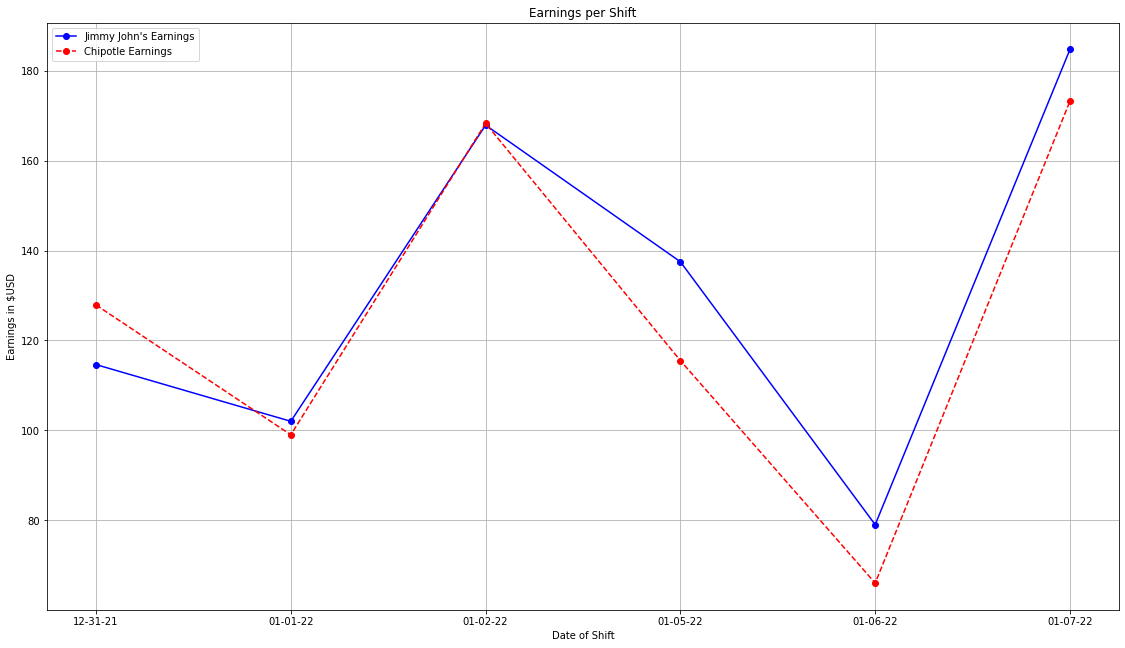

In [5]:
class show_me_the_money:

    df = pd.DataFrame(database_pull())
    
    
    plot_earnings(df)
    

In [6]:
display_and_save("jj_earnings")

Saving Dataframe to JSON file ... 



,date_of_shift,tips,hours,earnings,effective_wage,old_job_earnings,old_job_comparison,starting_mileage,ending_mileage,change_in_mileage
0,12-31-21,41.0,7.75,114.62,14.79,127.88,13.25,0,0,0
1,01-01-22,45.0,6.00,102.00,17.00,99.00,-3.00,0,0,0
2,01-02-22,71.0,10.20,167.90,16.46,168.30,0.40,0,0,0
3,01-05-22,71.0,7.00,137.50,19.64,115.50,-22.00,75190,75245,55
4,01-06-22,41.0,4.00,79.00,19.75,66.00,-13.00,75255,75290,35
5,01-07-22,85.0,10.50,184.75,17.60,173.25,-11.50,75300,75369,69


In [ ]:
earnings_df = pd.DataFrame(database_pull())

jj_date_index = set_Index(earnings_df, "date_of_shift")
jj_date_index

In [ ]:
jj_date_index.describe()

In [ ]:
# set up pymongo connection

# https://docs.mongodb.com/manual/reference/default-mongodb-port/

conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# # declare database
db = client.jj_earnings

# # declare the collections
collection = db.shifts

#### Is it possible to set up the variables for the databse, collection and documents 
# so that they can be filled in by information attained fromt the Query_database()?


# assign all DB names to list
# dblist = client.list_database_names()


In [ ]:
def database_pull():
    # set a list to clear per call
    # assign data base, then collection based on return from query_database()
    # data specific to jj_earnings is pulled via line 53, and a list of the documents is returned
    
    database = query_database()
    # declare database
    db = client.database
    return db


In [ ]:
def query_collections():
    # list = all collections in DB
    database = query_database()
    collection_list = client[database].list_collection_names()
    collection_dict = {}
    x = len(collection_list)
    db = client.database
   
    
    print(f' {x} collection(s) found in "{database}"')
    print('------------------------')
    # print each collection in list i.e. DB
    for count, collection in enumerate(collection_list):
        
        collection_dict[f'{collection}'] = count
        
        print()
        print(f'{count}-{collection}')
        print()
    print('------------------------')
    
    collection_query = input("Which collection would you like to load? ")
    
    print()
    if collection_query not in collection_list:
        raise ValueError("Collection not found, Try again.")
    else:
        collection = db.collection_query
        print("Collection found, Displaying Documents.")
        print(collection)
        return collection
        
    # write in means of obtaining the collection name to use in the database pull() method
    #overall goal -> list collections, request desired choice, set to variable, return choice
    
    # returned documents need to be in list of Dict form in the event that the 'All' feature is used in query/pull OR in 
    # event of documents not being in the same format as each other.


In [ ]:
# WORK IN PROGRESS# WORK IN PROGRESS# WORK IN PROGRESS# WORK IN PROGRESS# WORK IN PROGRESS# WORK IN PROGRESS

# pull and display documents to allow user to pick and choose what the display
# include an 'all' option to simplify the process. (exclude the _id field in document)
# include a means of inclusive (pick what you want) or exclusive (list what you dont want)
def query_documents():
    doc_list = []
    collection = query_collections()
    documents = collection.find()
    
    for doc in documents:
#         print(doc)
        doc_list.append(doc)
    print(doc_list)
# WORK IN PROGRESS# WORK IN PROGRESS# WORK IN PROGRESS# WORK IN PROGRESS# WORK IN PROGRESS# WORK IN PROGRESS


query_documents()
    

In [15]:

# temp solution to cut time - Remove after finalizing Query & pull structure

# temp solution to cut time - Remove after finalizing Query & pull structure


def database_pull_no_query(name):
    # set a list to clear per call
    # assign data base, then collection based on positional argument
    
    doc_list = []
    database = f'{name}'
    # declare database
    db = client.database

    # declare the collections
    
    documents = collection.find()
    for doc in documents:
#         print(doc)
        doc_list.append(doc)
    
    return doc_list
# temp solution to cut time - Remove after finalizing Query & pull structure

# temp solution to cut time - Remove after finalizing Query & pull structure

In [18]:
database_pull_no_query("jj_earnings")

[{'_id': ObjectId('61d91ad96ff8d725c83e3302'),
  'date_of_shift': '12-31-21',
  'tips': 41.0,
  'hours': 7.75,
  'earnings': 114.62,
  'effective_wage': 14.79,
  'old_job_earnings': 127.88,
  'old_job_comparison': 13.25,
  'starting_mileage': 0,
  'ending_mileage': 0,
  'change_in_mileage': 0},
 {'_id': ObjectId('61d91ad96ff8d725c83e3303'),
  'date_of_shift': '01-01-22',
  'tips': 45.0,
  'hours': 6.0,
  'earnings': 102.0,
  'effective_wage': 17.0,
  'old_job_earnings': 99.0,
  'old_job_comparison': -3.0,
  'starting_mileage': 0,
  'ending_mileage': 0,
  'change_in_mileage': 0},
 {'_id': ObjectId('61d91ad96ff8d725c83e3304'),
  'date_of_shift': '01-02-22',
  'tips': 71.0,
  'hours': 10.2,
  'earnings': 167.9,
  'effective_wage': 16.46,
  'old_job_earnings': 168.3,
  'old_job_comparison': 0.4,
  'starting_mileage': 0,
  'ending_mileage': 0,
  'change_in_mileage': 0},
 {'_id': ObjectId('61d91ad96ff8d725c83e3305'),
  'date_of_shift': '01-05-22',
  'tips': 71.0,
  'hours': 7.0,
  'earnings'

In [12]:
database = query_database()
collection = query_collections(database)
# documents = query_documents(collection)

6 Databases Found ... 

-admin

-commerce_db

-config

-jj_earnings

-local

-mars_app

------------------------
Which Database would you like to load? Use exact spelling.. jj_earnings

Database "jj_earnings" Successfully Loaded..

 2 collection(s) found in "jj_earnings"
------------------------

0-shifts


1-test

------------------------
Which collection would you like to load? ddd

Incorrect Data Entry, try that again.

Which collection would you like to load? test
Collection found, Displaying Documents.



In [ ]:
doc_list = []
database = client.jj_earnings
collection = database.shifts
# declare the collections

documents = collection.find()
for doc in documents:
#         print(doc)
    doc_list.append(doc)

print(doc_list)

display DBs, then after db is chosen display keys, ask which to view in dataframe
maybe have an inclusion/exclusion request. b/c sometimes you want all except 1 or 2 entries.

maybe looping input of 1 or 0 thats pushed to list, then list elements are added into find values?

"all" should do a complete loop minus the __id key.

convert return from find statement to pandas df

ask, want to save? yes-> request file name, save then display dataframe | no-> display dataframe


reshape functions to pull docs, add to list, display and request which info is desired

double while statement?

 then build a DF/find statement out of the desired info and display a pandas DF from said information
 
 have graphong function to request x / y values using name_of_df['column']
 ask for labels, colors, marker and line styles.
 plot the information
 
 consider multi plot for displaying all desired info comparisons at once, could be fun.